In [21]:
import json
import pandas as pd

with open("../chat_history_cutoff.json") as f:
    data = json.load(f)
    cdf = pd.json_normalize(data)

df = pd.concat([cdf], ignore_index=True)


df['gpu_energy.joules'] = df['gpu_energy'] * 3600000
df['gpu_energy.request'] = df['gpu_energy.joules'] / 100
df = df.loc[~df.debug_mode]

In [22]:
cutoff_df = df.dropna(subset=['cutoff'])

In [28]:
cutoff_df['gpu_energy.joules.divided'] = cutoff_df['gpu_energy.joules'] / 94

In [23]:
cutoff_df.set_index('cutoff', inplace=True)

model
meta-llama/Llama-3.2-3B-Instruct    Axes(0.125,0.11;0.775x0.77)
Name: gpu_energy.joules.divided, dtype: object

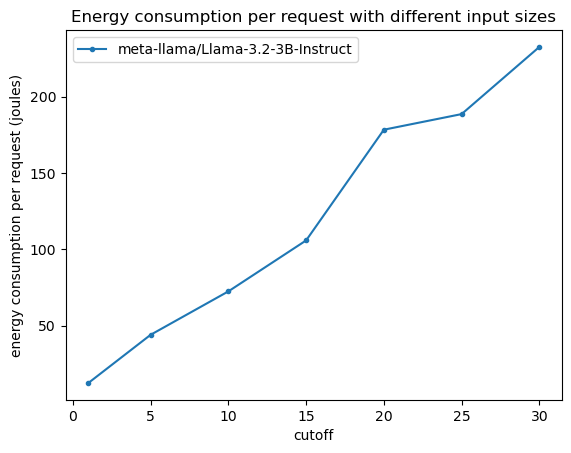

In [31]:
cutoff_df.groupby('model')['gpu_energy.joules.divided'].plot(
    legend=True,
    xlabel='cutoff',
    ylabel='energy consumption per request (joules)',
    rot=0,
    title='Energy consumption per request with different input sizes',
    style='.-',
)

model
meta-llama/Llama-3.2-3B-Instruct    Axes(0.125,0.11;0.775x0.77)
Name: score, dtype: object

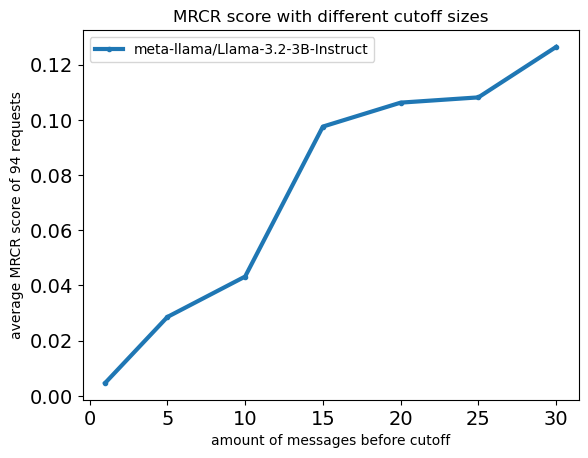

In [39]:
cutoff_df.groupby('model')['score'].plot(
    legend=True,
    xlabel='amount of messages before cutoff',
    ylabel='average MRCR score of 94 requests',
    rot=0,
    title='MRCR score with different cutoff sizes',
    style='.-',
    lw=3,
    fontsize=14,
)